# Pandas Data Visualization Exercises

This is just a quick exercise to review the various plots we showed earlier. Use <tt>df3.csv</tt> to replicate the following plots.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [60]:
# RUN THIS CELL
import pandas as pd
%matplotlib inline

df3 = pd.read_csv('df3.csv')
print(len(df3))
print(df3.head())

500
       weekday  produced  defective
0     1.Monday        73          7
1    2.Tuesday        75         10
2  3.Wednesday        86          7
3   4.Thursday        64          7
4     5.Friday        70          6


So <tt>df3</tt> has 500 records and 3 columns. The data represents factory production numbers and reported numbers of defects on certain days of the week.

### 1. Recreate this scatter plot of 'produced' vs 'defective'. Note the color and size of the points. Also note the figure size. See if you can figure out how to stretch it in a similar fashion.

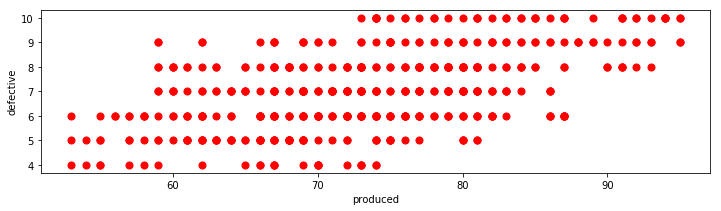

In [62]:
df3.plot(kind='scatter',x='produced',
         y='defective',c='r',figsize=(12,3),s=50);

### 2. Create a histogram of the 'produced' column.

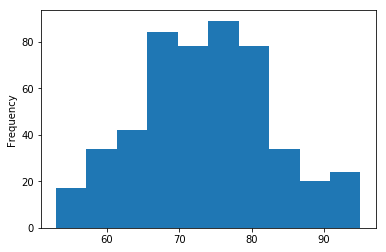

In [63]:
df3['produced'].plot(kind='hist')

### 3. Recreate the following histogram of 'produced', tightening the x-axis and adding lines between bars.

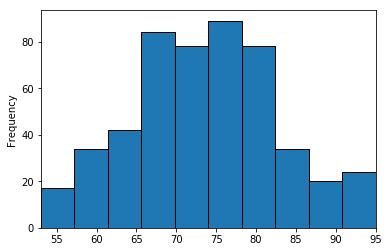

In [64]:
df3['produced'].plot(kind='hist',
                edgecolor='k').autoscale(
                enable=True,axis='x',tight=True)

### 4. Create a boxplot that shows 'produced' for each 'weekday' (hint: this is a groupby operation)

In [65]:
df3.head(4)

,weekday,produced,defective
0,1.Monday,73,7
1,2.Tuesday,75,10
2,3.Wednesday,86,7
3,4.Thursday,64,7


In [66]:
weekday_prod = df3.groupby('weekday').\
                        agg({'produced':'sum'})
weekday_prod = weekday_prod.reset_index()
weekday_prod

,weekday,produced
0,1.Monday,7042
1,2.Tuesday,8406
2,3.Wednesday,7625
3,4.Thursday,7131
4,5.Friday,6555


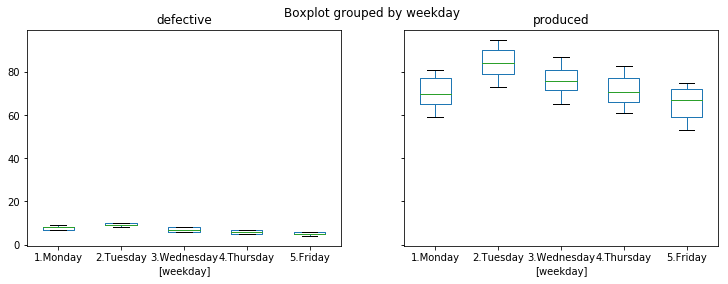

In [69]:
# In boxplot `by` performs groupby
df3.boxplot(by='weekday',grid=False, 
            figsize=(12,4));

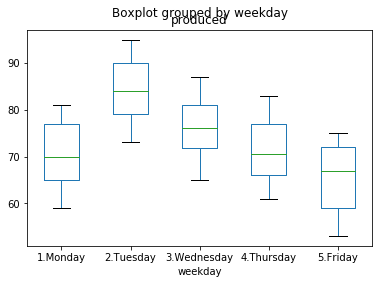

In [70]:
# Now select relevant column from it
df3.boxplot(by='weekday',column='produced',
            grid=False);

### 5. Create a KDE plot of the 'defective' column

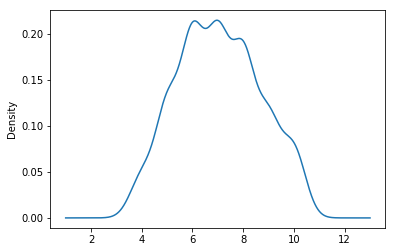

In [71]:
df3['defective'].plot(kind='kde')

### 6. For the above KDE plot, figure out how to increase the linewidth and make the linestyle dashed.<br>(Note: You would usually <em>not</em> dash a KDE plot line)

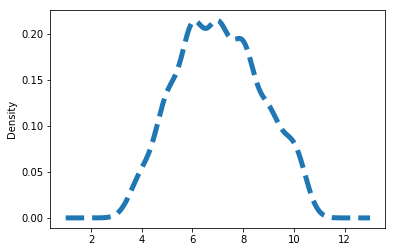

In [72]:
df3['defective'].plot(kind='kde',
                      lw=5,ls='--');

### 7. Create a <em>blended</em> area plot of all the columns for just the rows up to 30. (hint: use .loc)

In [73]:
df3.head(2)

,weekday,produced,defective
0,1.Monday,73,7
1,2.Tuesday,75,10


In [74]:
df3_ = df3.iloc[:30]
df3_.shape

(30, 3)

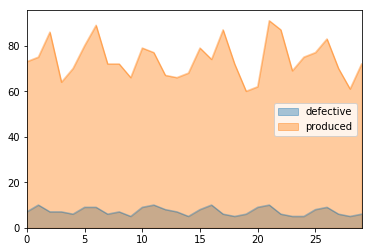

In [76]:
df3_[['defective','produced']]\
                .plot(kind='area',stacked=False,
                      alpha=0.4)

## Bonus Challenge!

<strong>Notice how the legend in our previous figure overlapped some of actual diagram.<br> Can you figure out how to display the legend outside of the plot as shown below?</strong>

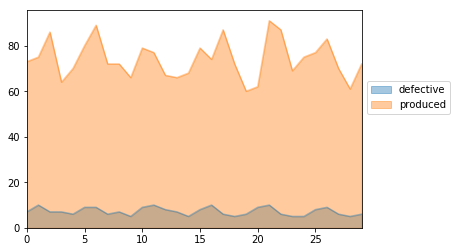

In [78]:
ax = df3_[['defective','produced']]\
                .plot(kind='area',alpha=0.4,
                      stacked=False)

ax.legend(loc=3, bbox_to_anchor=(1.0,0.5))